# EECS 491: Probabilistic Graphical Models Assignment 1
**David Fan, dmf98**

2/14/2018

## Problem Description
Let there exist an urn containing $N$ balls. In this urn, $m$ of the $N$ balls are white and the other $N-m$ of the $N$ balls are black. Suppose that a sample of size $n$ is to be chosen randomly (without replacement) from the urn. If we let random variable $X$ denote the number of white balls selected, we examine the probability that $X=i$ white balls are selected, given that $i=0,1,...,n$.

## Probability Analysis
The probability that $X=i$ white balls are selected, given that $i=0,1,...,n$ follows a hypergeometric probability distribution. Thus, the probability that $X=i$ is as follows:
$$Pr\{X=i\mid n,m,N\}=\frac{\binom{m}{i}\binom{N-m}{n-i}}{\binom{N}{n}}\quad i=0,1,...,n$$
Here it is clear that $P\{X=i\}$ is dependent on the unknown values of $N$ and $m$ (not $n$ because we know how much we sample for each trial). Let us simplify the problem down to one unknown parameter instead of two.

Now, suppose that we know the number of balls that were in the urn before we begin our trials. Thus, $N$ is a known quantity $N=N'$. We now wish to find
$$Pr\{X=i\mid n,m\}=\frac{\binom{m}{i}\binom{N'-m}{n-i}}{\binom{N'}{n}}\quad i=0,1,...,n$$
where $N'$ is some constant and $n$ is a known parameter, so m is the only unknown parameter in the problem.

## Simulation
Data for this problem would be generated by taking trials of varying sample size $n$ with $N'$ being a known fixed quantity and setting $n$ to different values. I shall conduct trials for several different values of $n$ with $N'=10000$ and an example hidden parameter $m=2500$ to generate a few probability distributions for random variable $X$ from observed data. Ideally the data should fit distribution: $$Pr\{X=i\mid n,m=2500\}=\frac{\binom{2500}{i}\binom{7500}{n-i}}{\binom{10000}{n}}\quad i=0,1,...,n$$

In [112]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt

trials = 10000

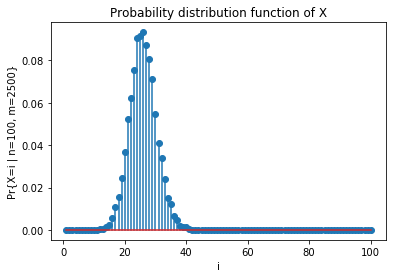

In [113]:
# n = 100
n = 100
X = np.arange(1,n+1)
p = np.zeros(n)
for i in range(trials):
    count = 0
    total = 10000
    m = 2500
    for trial in range(n):
        if randint(1, total) <= m:
            count += 1
            m -= 1
        total -= 1
    p[count] += 1
p /= trials
m = 2500
plt.stem(X, p, width = .8)
plt.title("Probability distribution function of X")
plt.xlabel("i")
plt.ylabel("Pr{X=i | n=%i, m=%i}" % (n,m))
plt.show()

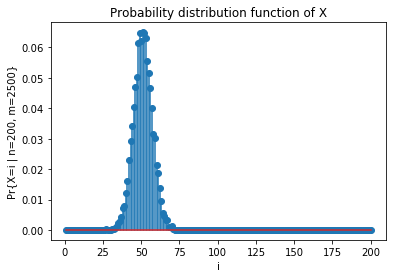

In [114]:
# n = 200
n = 200
X = np.arange(1,n+1)
p = np.zeros(n)
for i in range(trials):
    count = 0
    total = 10000
    m = 2500
    for trial in range(n):
        if randint(1, total) <= m:
            count += 1
            m -= 1
        total -= 1
    p[count] += 1
p /= trials
m = 2500
plt.stem(X, p, width = .8)
plt.title("Probability distribution function of X")
plt.xlabel("i")
plt.ylabel("Pr{X=i | n=%i, m=%i}" % (n,m))
plt.show()

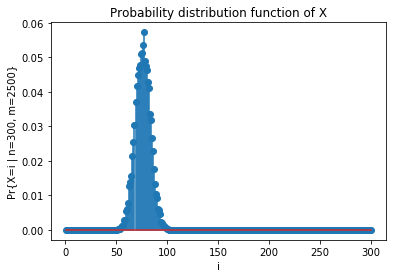

In [115]:
# n = 300
n = 300
X = np.arange(1,n+1)
p = np.zeros(n)
for i in range(trials):
    count = 0
    total = 10000
    m = 2500
    for trial in range(n):
        if randint(1, total) <= m:
            count += 1
            m -= 1
        total -= 1
    p[count] += 1
p /= trials
m = 2500
plt.stem(X, p, width = .8)
plt.title("Probability distribution function of X")
plt.xlabel("i")
plt.ylabel("Pr{X=i | n=%i, m=%i}" % (n,m))
plt.show()

## Determining the Hidden Parameter $m$
Given that we collect a finite $n$ balls from an urn with a known quantity $N$ balls, let us attempt to infer the number of white balls, $m$, given that we collected $X=x$ white balls. Applying Bayes Rule to the probability distribution function for random variable $X$, we get:
$$P\{m \mid X=x,n\}=\frac{P\{X=x \mid n,m\}P\{m\mid n\}}{P\{X=x \mid n\}}$$
where our posterior is $P\{m \mid X=x,n\}$, our likelyhood is $P\{X=x \mid n,m\}$, our prior is $P\{m\mid n\}$, and our normalizing constant is $P\{X=x \mid n\}$. We have shown above that we are able to calculate the likelyhood, so let us examine the prior. Since we don't know anything about how the balls were placed into the urn, it is safe to assume there was no bias for white balls over black balls, so a distribution of 
$$Pr\{m\} = \frac{1}{N-1}$$
is appropriate for the prior. The normalizing constant can be computed using the following integral:
$$P\{X=x \mid n\} = \int_{0}^{N}P\{X=x \mid n,m\}P\{m\mid n\}dm$$
$$P\{X=x \mid n\} = \frac{1}{N + 1}$$
With the normalizing constant and the prior known, we can find:
$$P\{m \mid X=x,n\}=\frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}}\frac{\frac{1}{N-1}}{\frac{1}{N + 1}}$$
So, the posterior is just proportional to the likelyhood:
$$P\{m \mid X=x,n\}\propto \frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}}$$
This means that we can substitute in values for $X$ and $n$ to evaluate the posterior!

## Evaluating the Posterior
To programatically evaluate the posterior, we can generate a random value for $N$ and a random value for $m$ such that $m<N$. The value of $m$ won't be known to our program, other than for the purposes of sampling. We can then sample and plot the posterior given the number of samples $n$ and the number of sampled white balls $X=x$. The posterior can then be estimated once a large number of samples has been taken. Running the following code cell demonstrates the evolution of the posterior distribution as the number of samples increases. 

In [116]:
from scipy.special import comb as nCr
from matplotlib import animation

def posterior(m, x, n, N):
    likelyhood = (nCr(m, x) * nCr(N - m, n - x)) / (nCr(N,n))
    prior = 1/(N-1)
    normalizing_constant = 1/(N+1)
    return likelyhood * prior / normalizing_constant
    

In [123]:
N = randint(1000,10000)
o_N = N
print("N =", o_N)
m = randint(0, N)
count = 0
m_axes = np.arange(0,N+1)
trials = 0

N = 3188


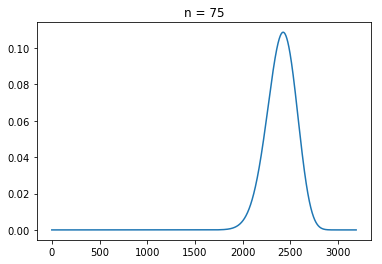

In [126]:
"""
Run this cell repeatedly to sample more and update the posterior plot
"""
for i in range(25):
    trials += 1
    if randint(0, N) <= m:
        count += 1
        m -= 1
    N -= 1
plt.title("n = %s" % trials)
plt.plot(m_axes, posterior(m_axes,count, trials, o_N))
plt.show()

N = 3273


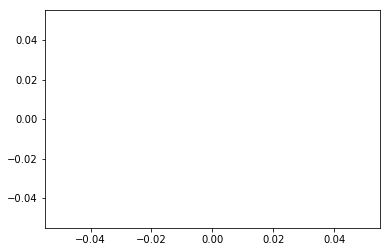

In [121]:
N = randint(1000,10000)
print("N =", N)
balls = N
m = randint(0, N)
fig = plt.figure()
ax = plt.axes()
line, = ax.plot([], [], lw=2)
white_count = 0
m_axes = np.arange(0,N+1)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global white_count
    if randint(0, balls) <= m:
        white_count += 1
        m -= 1
    balls -= 1
    y = posterior(m_axes, white_count, i, N)
    line.set_data(m_axes, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

## Updates
Following group discussion, I realized that when I was generating my model, I set up the problem as sampling _with_ replacement. It was an easy fix to have the model sample **without** replacement

## Bibliography
- Briggs and Zaretski, [A new look at inference for the Hypergeometric
Distribution.](http://wmbriggs.com/public/HGDAmstat4.pdf)
- Sheldon Ross, *A First Course in Probability*